In [1]:
#FILE READING
import pandas as pd
TweetData = pd.read_csv("Tweet.csv")
CompanyData = pd.read_csv("Company.csv")
Company_TweetData = pd.read_csv("Company_Tweet.csv")
CompanyValuesData = pd.read_csv("CompanyValues.csv")

In [2]:
print(TweetData.shape,CompanyData.shape,Company_TweetData.shape,CompanyValuesData.shape)
#print(TweetData.info(),CompanyData.info(),Company_TweetData.info(),CompanyValuesData.info())

(3717964, 7) (6, 2) (4336445, 2) (17528, 7)


In [3]:
#SEPERATING PRICES INTO OPEN AND CLOSE TO CHECK ON WHICH DAYS WAS PRICE HIGHER THAN PREVIOUS DAY
list_of_open_prices = CompanyValuesData['open_value']
list_of_close_prices = CompanyValuesData['close_value']

In [4]:
price_movement = []
price_movement.append(1)
for i in range(1,len(list_of_close_prices)):
    if(list_of_close_prices[i-1] < list_of_close_prices[i]):
        price_movement.append(1)
    else:
        price_movement.append(0)

In [5]:
CompanyValuesData["price_movement"] = price_movement

In [6]:
#print(CompanyValuesData.info())

In [7]:
#TILL HERE WHAT WE HAVE

#   1. DATASET WITH UP AND DOWN MOVE
#   2. DATASET WITH TWEETS FOR THE COMPANY

In [8]:
Company_TweetData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4336445 entries, 0 to 4336444
Data columns (total 2 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   tweet_id       int64 
 1   ticker_symbol  object
dtypes: int64(1), object(1)
memory usage: 66.2+ MB


Counter({'AAPL': 1425013, 'TSLA': 1096868, 'AMZN': 718715, 'GOOG': 392569, 'MSFT': 375711, 'GOOGL': 327569})


<AxesSubplot:>

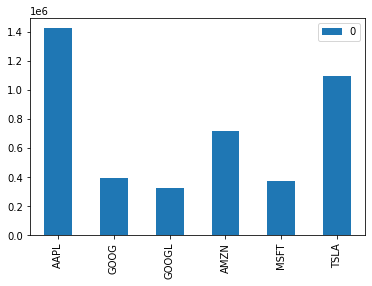

In [9]:
from collections import Counter
companyTweets = Company_TweetData['ticker_symbol']
companyNumberOfMentions = Counter(companyTweets)
print(companyNumberOfMentions)
df = pd.DataFrame.from_dict(companyNumberOfMentions, orient='index')
df.plot(kind='bar')

In [10]:
MASTER_DATA_SET_OF_TWEETS = pd.merge(TweetData, Company_TweetData, on="tweet_id")

In [11]:
MASTER_DATA_SET_OF_TWEETS.pop('tweet_id')
MASTER_DATA_SET_OF_TWEETS.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4336445 entries, 0 to 4336444
Data columns (total 7 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   writer         object
 1   post_date      int64 
 2   body           object
 3   comment_num    int64 
 4   retweet_num    int64 
 5   like_num       int64 
 6   ticker_symbol  object
dtypes: int64(4), object(3)
memory usage: 264.7+ MB


In [12]:
set_of_all_timestamps = MASTER_DATA_SET_OF_TWEETS['post_date']

In [13]:
from datetime import datetime
day_date = []
for i in set_of_all_timestamps:
    dateFormatted = datetime.fromtimestamp(i).isoformat()
    dateSliced = dateFormatted[:10]
    day_date.append(dateSliced)

In [14]:
MASTER_DATA_SET_OF_TWEETS.pop('post_date')
MASTER_DATA_SET_OF_TWEETS['day_date'] = day_date

In [15]:
MASTER_DATA_SET_OF_TWEETS.head()

,writer,body,comment_num,retweet_num,like_num,ticker_symbol,day_date
0,VisualStockRSRC,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1,AAPL,2015-01-01
1,KeralaGuy77,Insanity of today weirdo massive selling. $aap...,0,0,0,AAPL,2015-01-01
2,DozenStocks,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,0,0,0,AMZN,2015-01-01
3,ShowDreamCar,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,0,0,1,TSLA,2015-01-01
4,i_Know_First,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,AAPL,2015-01-01


In [16]:
CompanyValuesData.head()

,ticker_symbol,day_date,close_value,volume,open_value,high_value,low_value,price_movement
0,AAPL,2020-05-29,317.94,38399530,319.25,321.15,316.47,1
1,AAPL,2020-05-28,318.25,33449100,316.77,323.44,315.63,1
2,AAPL,2020-05-27,318.11,28236270,316.14,318.71,313.09,0
3,AAPL,2020-05-26,316.73,31380450,323.50,324.24,316.50,0
4,AAPL,2020-05-22,318.89,20450750,315.77,319.23,315.35,1


In [17]:
recentCompanyValuesData = []
count=0

for ind in CompanyValuesData.index:
    day_date = CompanyValuesData['day_date'][ind]
    if(int(day_date[:4])>=2015):
        recentCompanyValuesData.append(CompanyValuesData.iloc[ind])
    else:
        count+=1

updatedRecentCompanyValuesData = pd.DataFrame(recentCompanyValuesData) 

In [18]:
MASTER_DATA_SET = pd.merge(MASTER_DATA_SET_OF_TWEETS,updatedRecentCompanyValuesData,on=['day_date','ticker_symbol'])

In [19]:
Label = MASTER_DATA_SET.pop('price_movement')

In [20]:
MASTER_DATA_SET

,writer,body,comment_num,retweet_num,like_num,ticker_symbol,day_date,close_value,volume,open_value,high_value,low_value
0,VisualStockRSRC,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1,AAPL,2015-01-01,110.38,41304780,112.82,113.13,110.21
1,KeralaGuy77,Insanity of today weirdo massive selling. $aap...,0,0,0,AAPL,2015-01-01,110.38,41304780,112.82,113.13,110.21
2,i_Know_First,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,AAPL,2015-01-01,110.38,41304780,112.82,113.13,110.21
3,aaplstocknews,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,AAPL,2015-01-01,110.38,41304780,112.82,113.13,110.21
4,iknowfirst,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,AAPL,2015-01-01,110.38,41304780,112.82,113.13,110.21
...,...,...,...,...,...,...,...,...,...,...,...,...
4335719,jedimarkus77,So bullish.... $GOOG $GOOGL,0,0,7,GOOGL,2019-12-31,1339.39,976061,1335.79,1340.66,1332.13
4335720,StckPro,$GOOGL NEW ARTICLE : Did YouTube Delete Bitcoi...,0,0,0,GOOGL,2019-12-31,1339.39,976061,1335.79,1340.66,1332.13
4335721,AsianOptionGirl,"Today, after the bigly failed Trump stock pump...",0,1,3,GOOGL,2019-12-31,1339.39,976061,1335.79,1340.66,1332.13
4335722,peregrin_go,@kopin shareholders must do #DueDiligence. $K...,1,0,1,GOOGL,2019-12-31,1339.39,976061,1335.79,1340.66,1332.13


In [59]:
import sklearn.model_selection as model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(MASTER_DATA_SET, Label, train_size=0.65, random_state=69)
#print ("X_train: ", X_train)
#print ("y_train: ", y_train)
#print("X_test: ", X_test)
#print ("y_test: ", y_test)

In [60]:
################################################################# PREP ###################################################################

In [211]:
Tweet_body_df = X_train['body']
pre_processed_Tweet_body_list = []

In [ ]:
import re                                
import string                             

from nltk.corpus import stopwords  
from nltk.stem.snowball import SnowballStemmer

begintime = time.time()
english_stopwords = stopwords.words('english')
snow_stemmer = SnowballStemmer(language='english')
count = 0
#lenght of largest tweet = 57 words
for ind in range(1,len(Tweet_body_df)):
    tweet = Tweet_body_df.iloc[ind]
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
    tweet = re.sub('[^a-zA-z]',' ',tweet)
    tweet = tweet.split()
    tweet = [snow_stemmer.stem(i.lower()) for i in tweet if i not in english_stopwords]
    tweet = list(set(tweet))
    len_to_pad = 58 - len(tweet)
    pad_list = [ "*" for i in range(len_to_pad)]
    tweet += pad_list
    tweet_str = " ".join(tweet)
    pre_processed_Tweet_body_list.append(tweet_str)

end = time.time()
# total time taken
print(f"Total runtime of the program is {end - begintime}")

In [ ]:
pre_processed_Tweet_body_df = pd.DataFrame(pre_processed_Tweet_body_list,columns=["Pre-Processed-Body"])
print(pre_processed_Tweet_body_df)

In [ ]:
################ TEXT PRE PROCESSING COMPLETE ##########################